# Data visualization and EDA


In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load the COVID-19 dataset from "Our World in Data": https://covid.ourworldindata.org/data/owid-covid-data.csv
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
df = pd.read_csv(url)

# Check for missing values
print("Missing values:")
print(df.isnull().sum())

# Handle missing values (e.g., fill with mean or drop rows with missing values)
# In this exercise, we will drop missing values for specific columns
print("shape before dropping nulls: ",df.shape)
columns_to_clean = ["location", "date", "total_cases", "total_deaths", "total_tests"]
# example drop missing values in specific columns
df = df.dropna(subset=columns_to_clean)
print("shape after dropping nulls: ",df.shape)




Missing values:
iso_code                                        0
continent                                   26525
location                                        0
date                                            0
total_cases                                 17631
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
Length: 67, dtype: int64
shape before dropping nulls:  (429435, 67)
shape after dropping nulls:  (78390, 67)


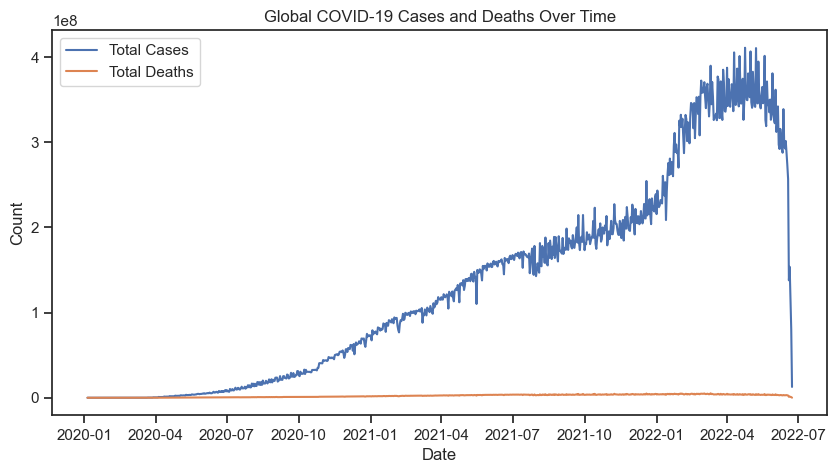

In [56]:
#Plot the total number of cases and deaths cumulative over time globally.

df['date'] = pd.to_datetime(df['date'])
global_cases = df.groupby('date')['total_cases'].sum()
global_deaths = df.groupby('date')['total_deaths'].sum()

plt.figure(figsize=(10, 5))
plt.plot(global_cases, label='Total Cases')
plt.plot(global_deaths, label='Total Deaths')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Global COVID-19 Cases and Deaths Over Time')
plt.show()


#### Questions:
* What insights can you derive from this plot?
You can tell that the total cases increases somewhat linearly and significantly increases in late 2021 and early 2022 and has a drastic fall out during 2022-07.  
* What can you tell about the pattern of daily new deaths from the plot?
There is little to no information to obtain about total deaths mainly because the numbers are so far apart from total cases so it makes it extremely hard to see any movement in the total deaths plot.

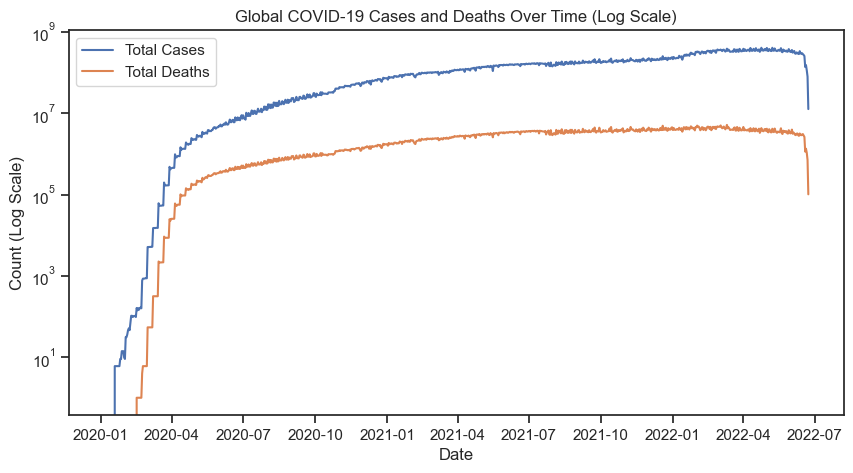

In [57]:
#TODO Now, plot the same as above but with a logarithmic scale for y
plt.figure(figsize=(10, 5))
plt.plot(global_cases, label='Total Cases')
plt.plot(global_deaths, label='Total Deaths')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Count (Log Scale)')
plt.title('Global COVID-19 Cases and Deaths Over Time (Log Scale)')
plt.yscale('log')
plt.show()


What can you tell about the pattern of daily new deaths from the second plot?
With the regular scale it looks like a linear increase until it reaches 2022 when it ramps up significantly.
On the logarithmic scale it ramps up right away and is near peak already during 2020 and slowly increases after the quick ramp up.

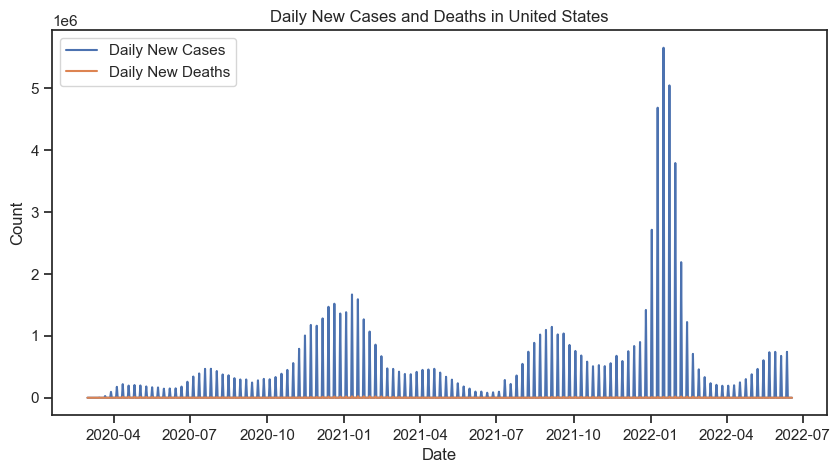

In [58]:
# Plot the number of cases and deaths over time in the country with the maximum number of cases
cases_max = df.loc[df['total_cases'].idxmax()]['location']
country_data = df[df['location'] == cases_max]

plt.figure(figsize=(10, 5))
plt.plot(country_data['date'], country_data['new_cases'], label='Daily New Cases')
plt.plot(country_data['date'], country_data['new_deaths'], label='Daily New Deaths')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Count')
plt.title(f'Daily New Cases and Deaths in {cases_max}')
plt.show()


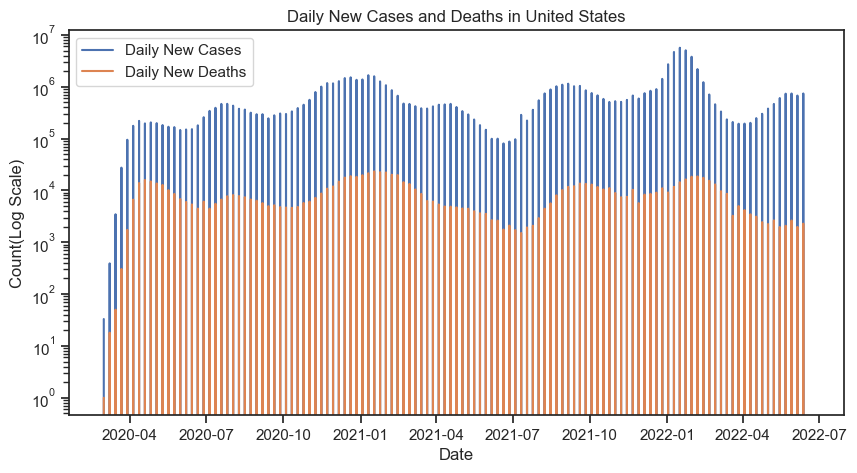

In [59]:
#TODO Again, plot the same as above but with a logarithmic scale for y
cases_max = df.loc[df['total_cases'].idxmax()]['location']
country_data = df[df['location'] == cases_max]

plt.figure(figsize=(10, 5))
plt.plot(country_data['date'], country_data['new_cases'], label='Daily New Cases')
plt.plot(country_data['date'], country_data['new_deaths'], label='Daily New Deaths')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Count(Log Scale)')
plt.title(f'Daily New Cases and Deaths in {cases_max}')
plt.yscale('log')
plt.show()


#### Questions
Compare and contrast the insights that you can get from the 2 previous plots
* What insights do you keep/lose depending on the scale?

You can not see the Daily New Cases on the first graph, it looks like it is always at 0 because the number for Daily New Deaths are so high.
On the log graph it is noticable that the DNC and DNDs fluctuate with one another and there is a similar pattern to be seen.  Although without the knowledge of how logs work the 
graph would be quite deceptive to the untrained individual.  10^4 compared to 10^6 is a huge difference but it looks quite minimal on this graph.

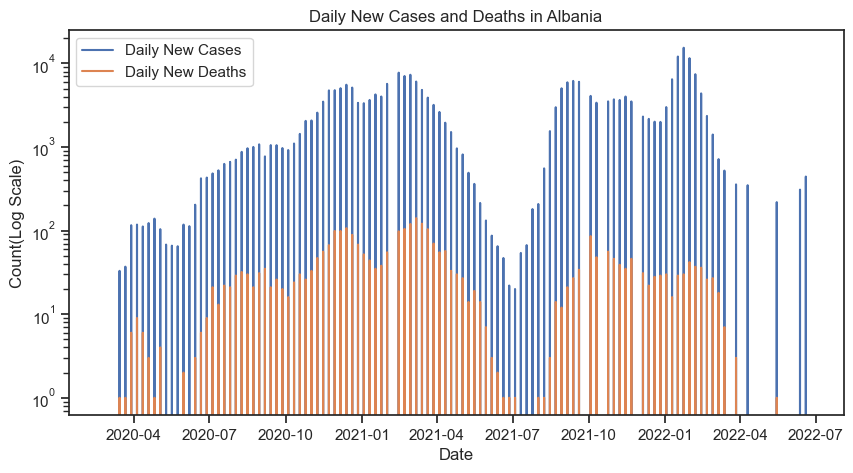

In [60]:
#TODO Repeat the step above but for the country with the minimum number of total cases
cases_min = df.loc[df['total_cases'].idxmin()]['location']
country_data = df[df['location'] == cases_min]

plt.figure(figsize=(10, 5))
plt.plot(country_data['date'], country_data['new_cases'], label='Daily New Cases')
plt.plot(country_data['date'], country_data['new_deaths'], label='Daily New Deaths')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Count(Log Scale)')
plt.title(f'Daily New Cases and Deaths in {cases_min}')
plt.yscale('log')
plt.show()

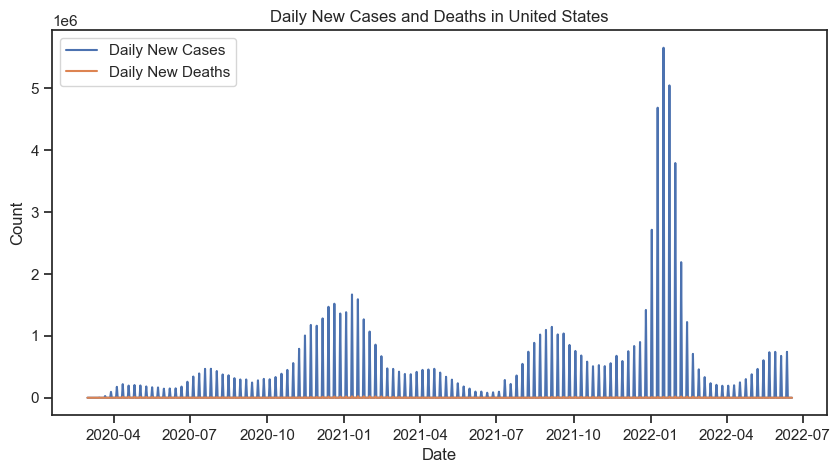

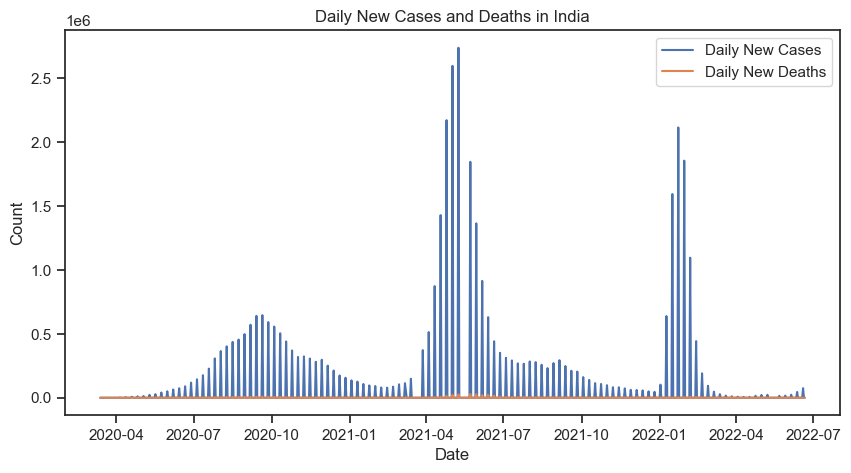

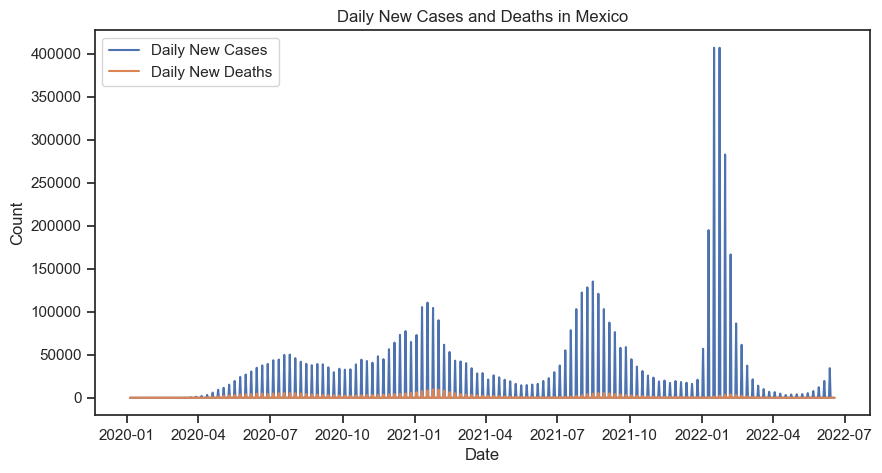

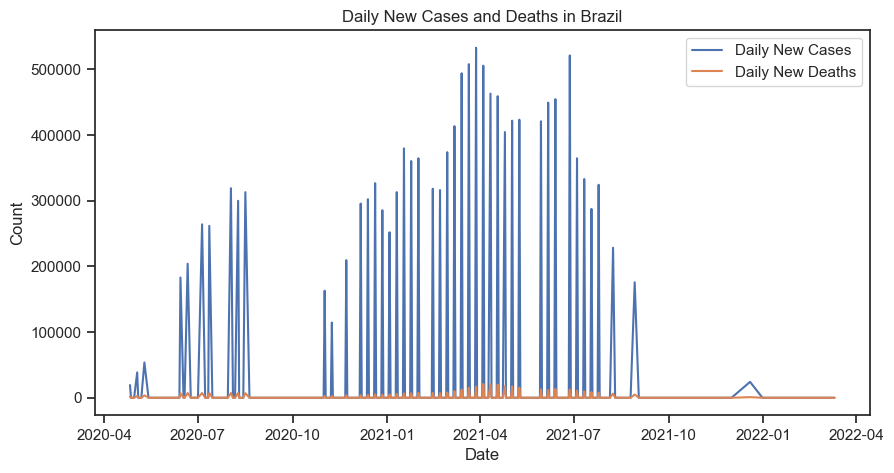

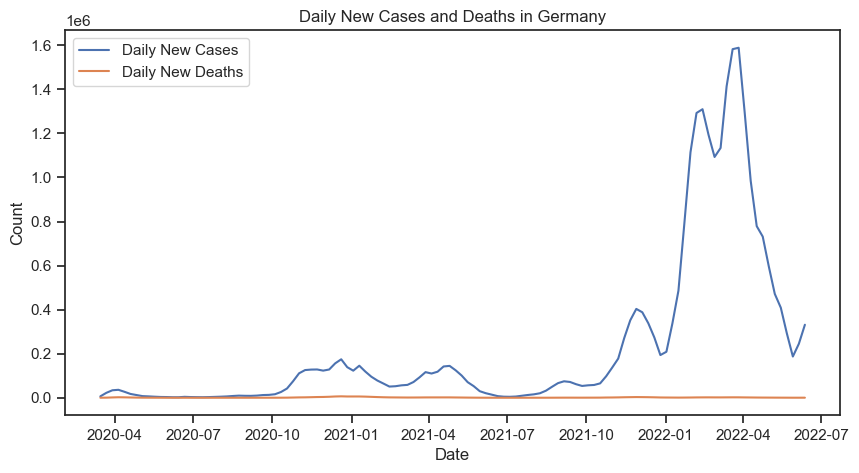

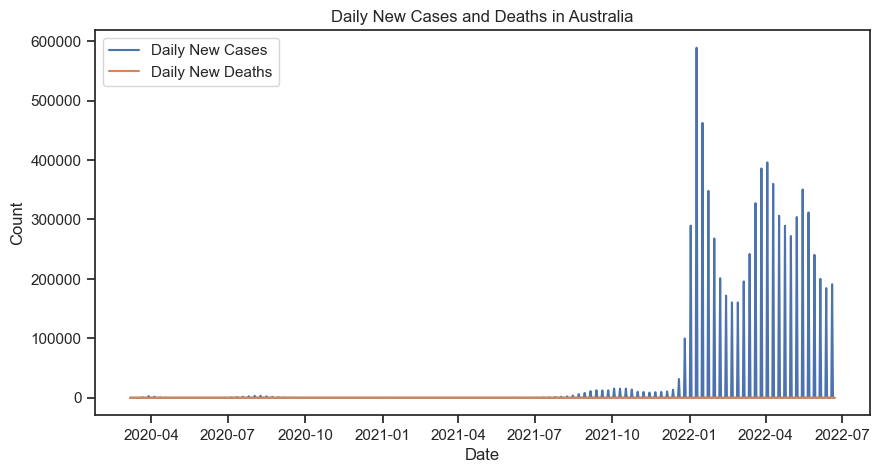

In [61]:
# Plot the number of cases and deaths over time for selected countries
selected_countries = ['United States', 'India', 'Mexico', 'Brazil', 'Germany', 'Australia']
for cases_country in selected_countries:
    country_data = df[df['location'] == cases_country]
    plt.figure(figsize=(10, 5))
    plt.plot(country_data['date'], country_data['new_cases'], label='Daily New Cases')
    plt.plot(country_data['date'], country_data['new_deaths'], label='Daily New Deaths')
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.title(f'Daily New Cases and Deaths in {cases_country}')
    plt.show()


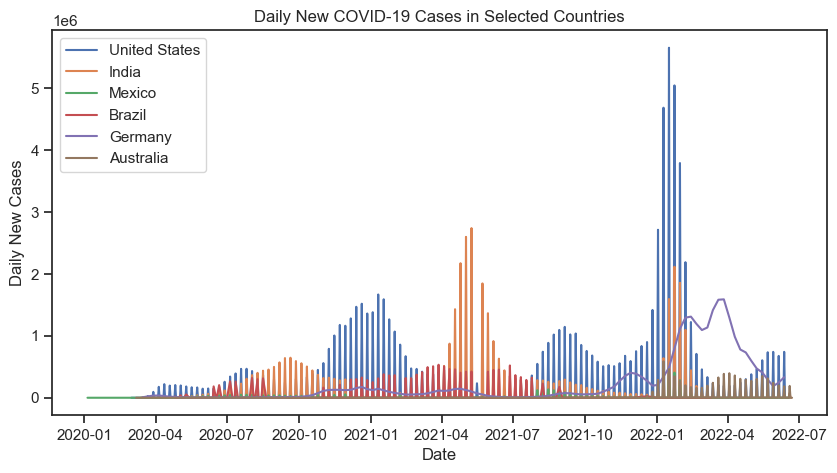

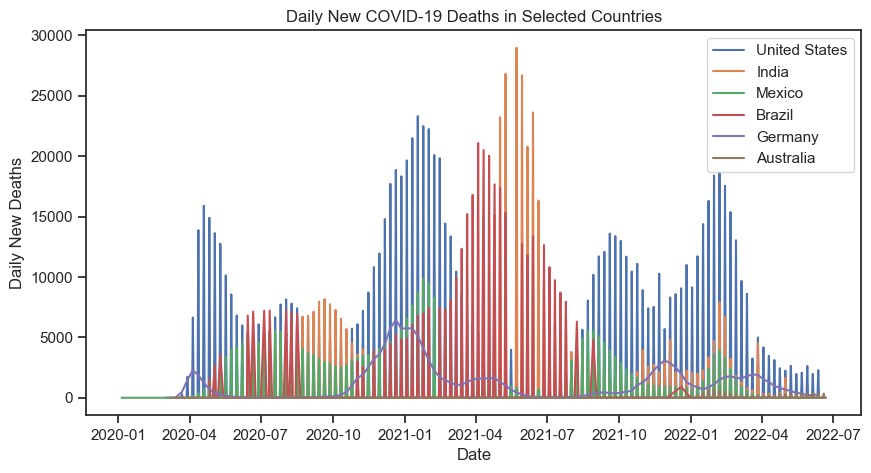

In [62]:
#TODO Now, instead of plotting each country separately, produce two plots:
# 1) New cases for all the selected countries
# 2) New deaths fro all the selected countries
# Make sure to add labels for each of the countries
plt.figure(figsize=(10, 5))

for cases_country in selected_countries:
    country_data = df[df['location'] == cases_country]
    plt.plot(country_data['date'], country_data['new_cases'], label=cases_country)

plt.legend()
plt.xlabel('Date')
plt.ylabel('Daily New Cases')
plt.title('Daily New COVID-19 Cases in Selected Countries')
plt.show()

plt.figure(figsize=(10, 5))

for cases_country in selected_countries:
    country_data = df[df['location'] == cases_country]
    plt.plot(country_data['date'], country_data['new_deaths'], label=cases_country)

plt.legend()
plt.xlabel('Date')
plt.ylabel('Daily New Deaths')
plt.title('Daily New COVID-19 Deaths in Selected Countries')
plt.show()


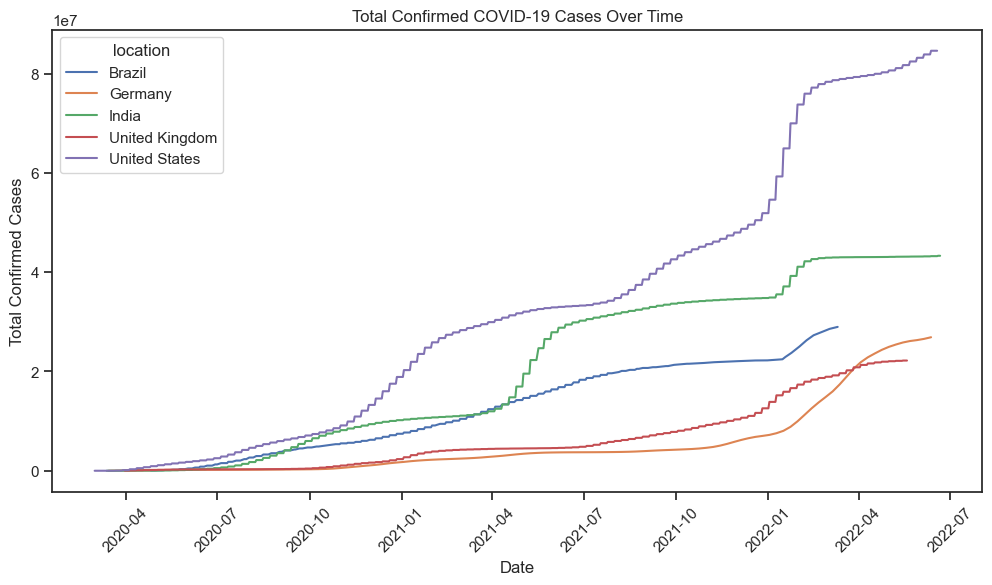

In [63]:
# Visualize the confirmed cases for selected countries
selected_countries = ['United States', 'India', 'Brazil', 'United Kingdom', 'Germany']

# Visualize the total confirmed cases over time (total_cases)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df[df['location'].isin(selected_countries)], x='date', y='total_cases', hue='location')
plt.title("Total Confirmed COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Confirmed Cases")
plt.xticks(rotation=45)
plt.show()




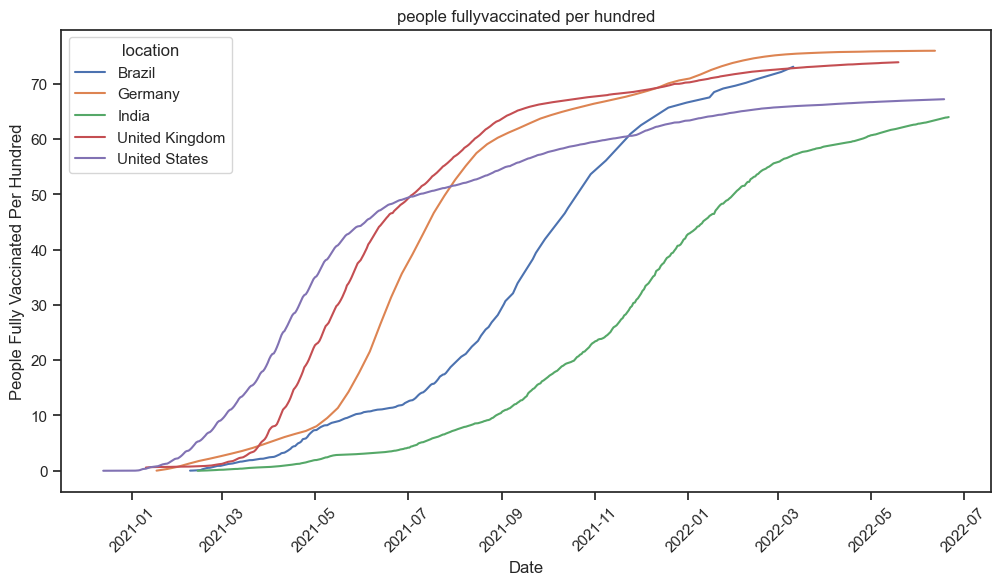

In [64]:
# Visualize the vaccination progress for selected countries 
#TODO Produce a graph like the one before, but for people_fully_vaccinated_per_hundred
selected_countries = ['United States', 'India', 'Brazil', 'United Kingdom', 'Germany']

# Visualize the total confirmed cases over time (total_cases)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df[df['location'].isin(selected_countries)], x='date', y='people_fully_vaccinated_per_hundred', hue='location')
plt.title("people fullyvaccinated per hundred")
plt.xlabel("Date")
plt.ylabel("People Fully Vaccinated Per Hundred")
plt.xticks(rotation=45)
plt.show()

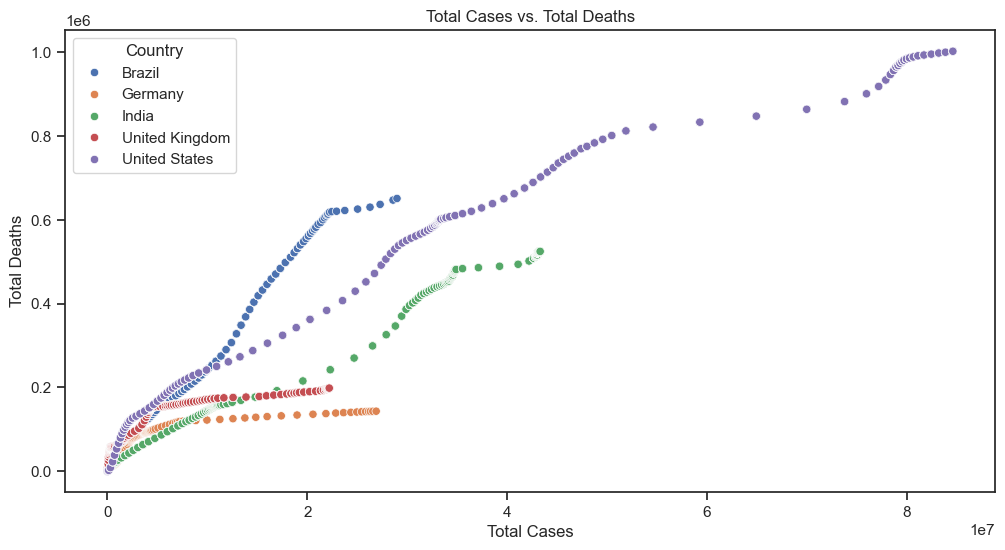

In [65]:
# You can use various Seaborn visualization functions to gain insights into the data.
# Visualize total cases vs. total deaths using seaborn
plt.figure(figsize=(12, 6))
sns.scatterplot(x='total_cases', y='total_deaths', data=df[df['location'].isin(selected_countries)],hue='location')
plt.xlabel("Total Cases")
plt.ylabel("Total Deaths")
plt.title("Total Cases vs. Total Deaths")
plt.legend(title='Country')
plt.show()

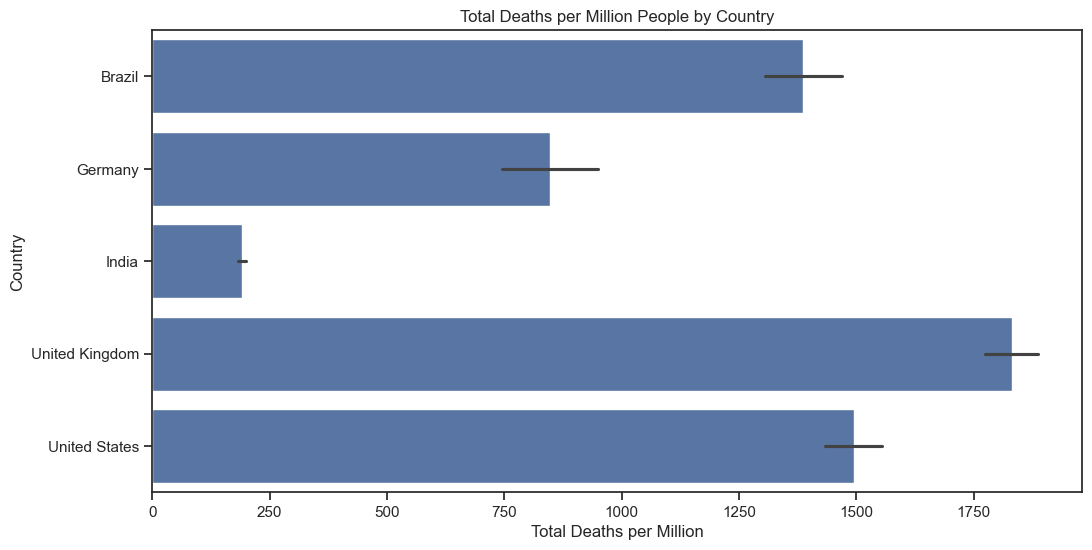

In [66]:
#you can visualize the total deaths per million people for different countries.
plt.figure(figsize=(12, 6))
sns.barplot(data=df[df['location'].isin(selected_countries)], x='total_deaths_per_million', y='location')
plt.title("Total Deaths per Million People by Country")
plt.xlabel("Total Deaths per Million")
plt.ylabel("Country")
plt.show()


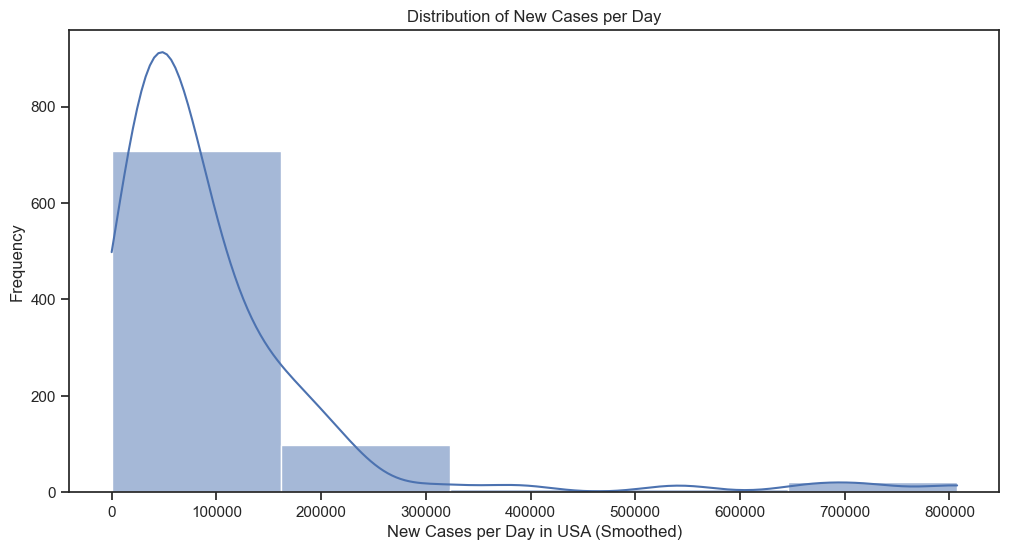

In [67]:
# You can also visualize the number of new cases per day in a histogram.
plt.figure(figsize=(12, 6))
sns.histplot(data=df[df['location'].isin(['United States'])], x='new_cases_smoothed', bins=5, kde=True)
plt.title("Distribution of New Cases per Day")
plt.xlabel("New Cases per Day in USA (Smoothed)")
plt.ylabel("Frequency")
plt.show()

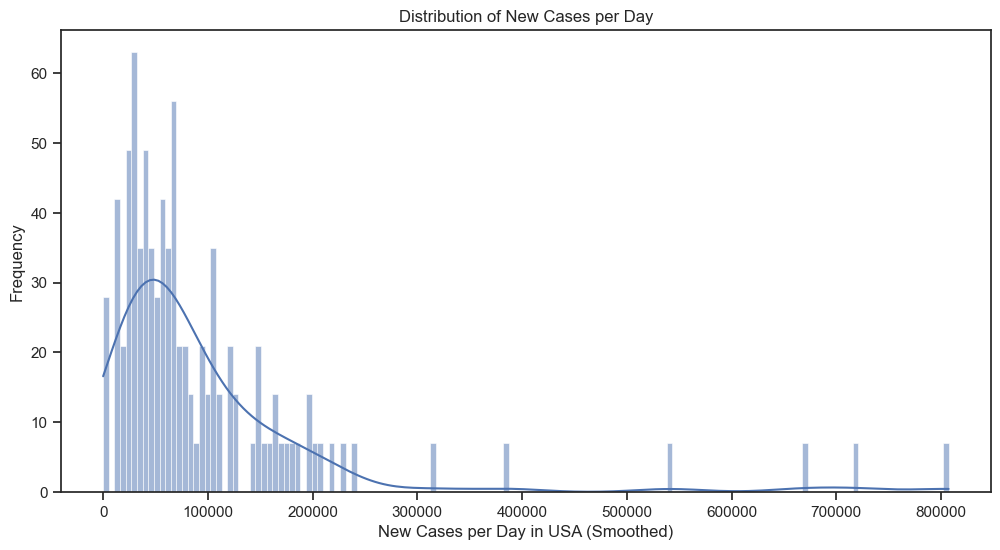

In [68]:
#TODO Change the number of bins to show more insight into the data
plt.figure(figsize=(12, 6))
sns.histplot(data=df[df['location'].isin(['United States'])], x='new_cases_smoothed', bins=150, kde=True)
plt.title("Distribution of New Cases per Day")
plt.xlabel("New Cases per Day in USA (Smoothed)")
plt.ylabel("Frequency")
plt.show()

In [69]:
#If running in Google Colab: !pip install pandas plotly

In [70]:
#NOTE If you have trouble with this one, execute in Google Colab

# Filter for the most recent date for each country
latest_data = df.loc[df.groupby('location')['date'].idxmax()]

# Select relevant columns
latest_data = latest_data[['location', 'total_cases', 'iso_code']]

# Remove rows with missing total cases data
latest_data = latest_data.dropna(subset=['total_cases'])

# Exclude continents and regions to focus only on countries
latest_data = latest_data[~latest_data['iso_code'].str.contains('OWID_')]
import plotly.express as px

# Create a choropleth map using Plotly
fig = px.choropleth(
    latest_data,
    locations="iso_code",        # The column containing the ISO country codes
    color="total_cases",         # The data to be color-coded
    hover_name="location",       # The column to display as the hover name
    color_continuous_scale=px.colors.sequential.Plasma,  # Color scale
    title="Total COVID-19 Cases per Country",   # Title of the map
    labels={'total_cases':'Total Cases'},       # Label for the color bar
    projection="natural earth"                  # Map projection type
)

# Display the map
fig.show()


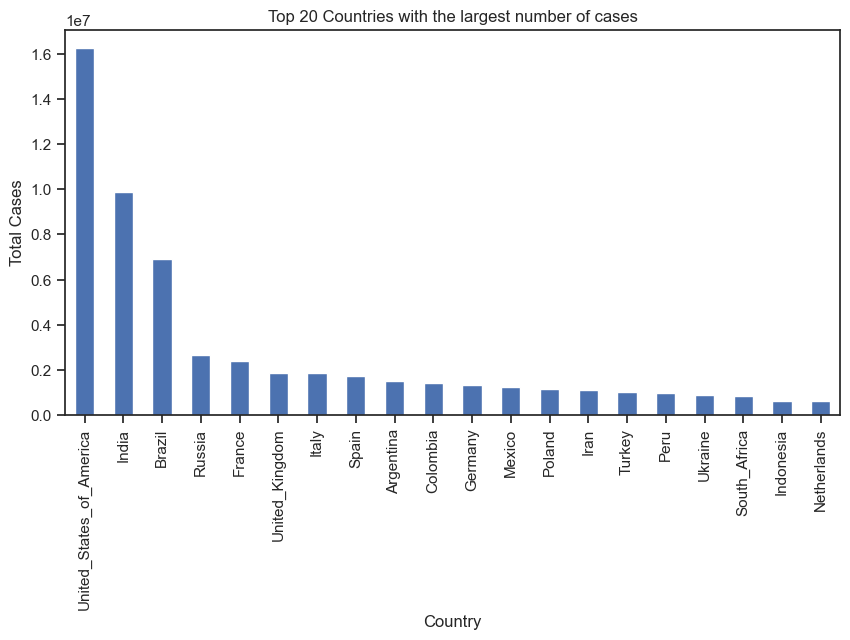

In [71]:
# lets look at the case distribution

url = 'https://opendata.ecdc.europa.eu/covid19/casedistribution/csv'
df = pd.read_csv(url)

import matplotlib.pyplot as plt

df['dateRep'] = pd.to_datetime(df['dateRep'], format='%d/%m/%Y')
total_cases = df.groupby('countriesAndTerritories')['cases'].sum().sort_values(ascending=False)
total_deaths = df.groupby('countriesAndTerritories')['deaths'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
total_cases.nlargest(20).plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.title('Top 20 Countries with the largest number of cases')
plt.show()


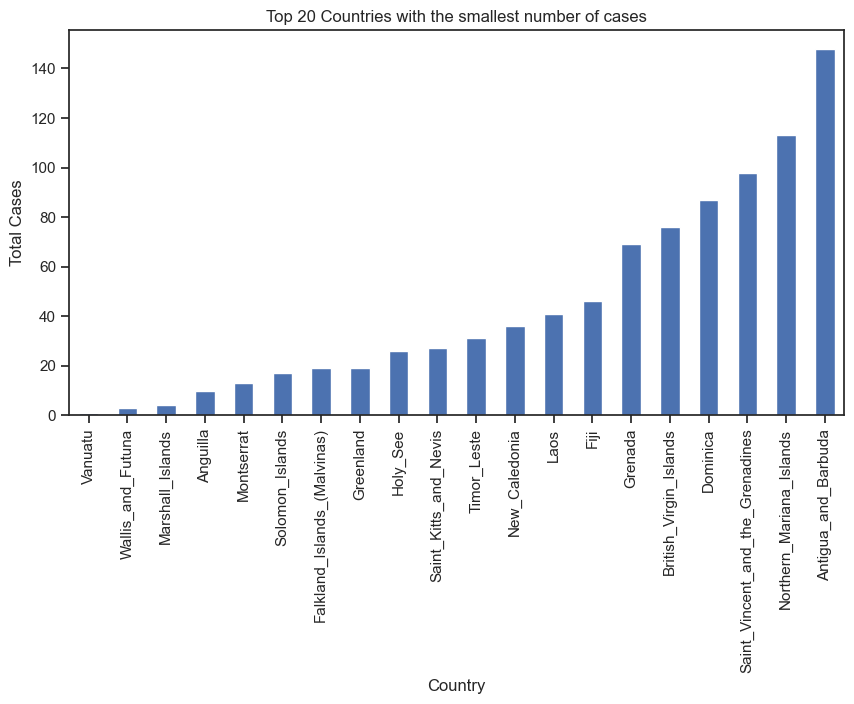

In [72]:
#TODO Now plot the top 20 countries with the smallest number of cases
url = 'https://opendata.ecdc.europa.eu/covid19/casedistribution/csv'
df = pd.read_csv(url)

import matplotlib.pyplot as plt

df['dateRep'] = pd.to_datetime(df['dateRep'], format='%d/%m/%Y')
total_cases = df.groupby('countriesAndTerritories')['cases'].sum().sort_values(ascending=False)
total_deaths = df.groupby('countriesAndTerritories')['deaths'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
total_cases.nsmallest(20).plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.title('Top 20 Countries with the smallest number of cases')
plt.show()

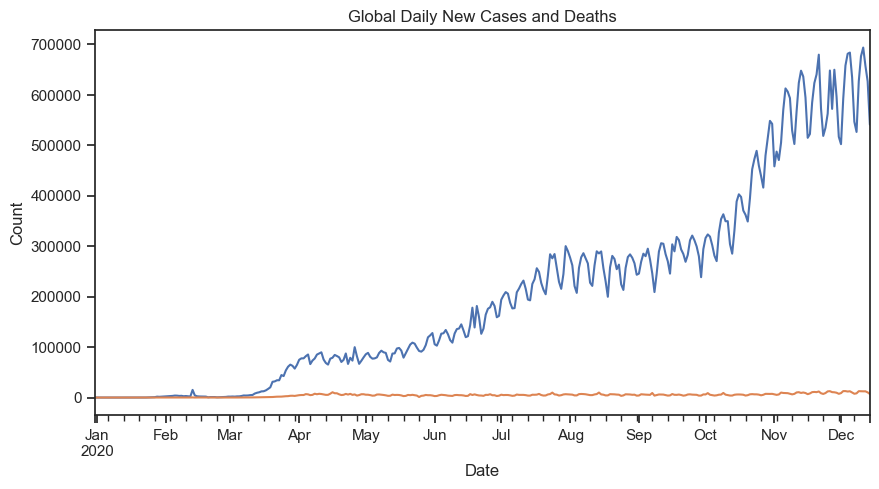

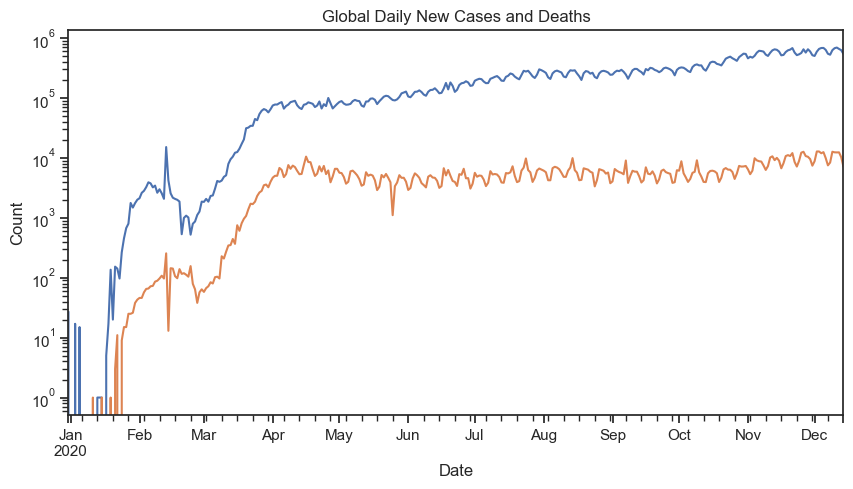

In [73]:
# Here we are plottig the global daily number of new cases and deaths in linear and logarithmic scle

plt.figure(figsize=(10, 5))
df.groupby('dateRep')['cases'].sum().plot()
df.groupby('dateRep')['deaths'].sum().plot()
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Global Daily New Cases and Deaths')
plt.show()


plt.figure(figsize=(10, 5))
df.groupby('dateRep')['cases'].sum().plot()
df.groupby('dateRep')['deaths'].sum().plot()
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Global Daily New Cases and Deaths')
plt.yscale('log')
plt.show()

#### Questions:

* What insights can you derive from the plots?
It is noticable comparing new cases and new deaths on a log scale that there is a similarity in the two.  They both tend to increase and decrease around the same times, they both have the same patterns as well.  Although you can not visually see that with the standard graph.
* What are the pros and cons of the linear scale?
The pros of the linear scale is having the ability to see the correct numbers and have a good representation of the actual difference between the two when comparing them.  The con is its hard to see correlation between the two with the numbers being drastically different.
* What are the pros and cons of the log scale?
The pros of using the log scale is being able to see patterns a lot easier, the con is that it misrepresents the numbers visually, it looks like new deaths and cases are pretty close when in reality they are exremely far apart.

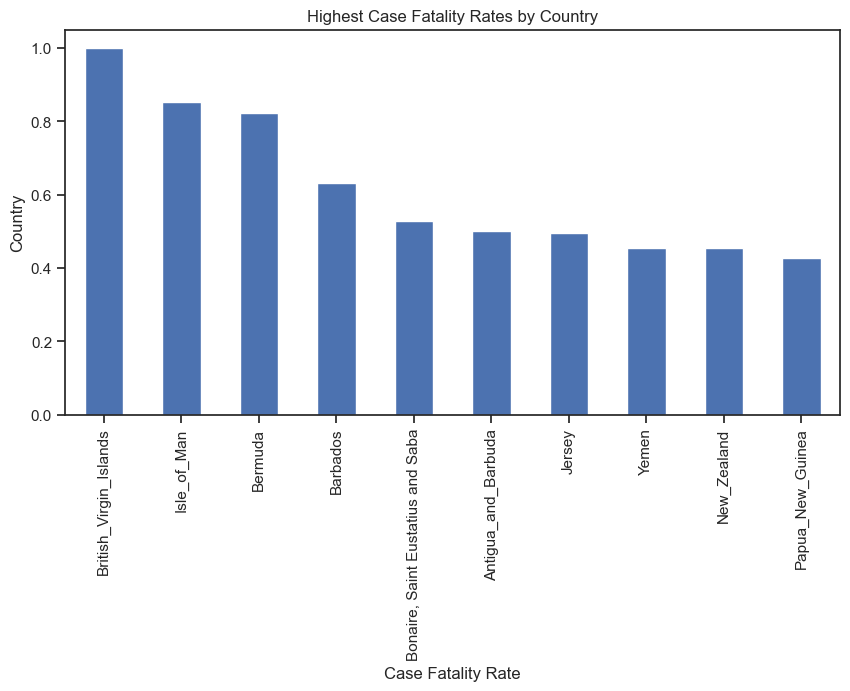

In [74]:
import numpy as np

# Load the data
url = 'https://opendata.ecdc.europa.eu/covid19/casedistribution/csv'
df = pd.read_csv(url)

# Calculate the case fatality rate (CFR)
df['CFR'] = df['deaths'] / df['cases']

# Replace inf and -inf with zero
df.replace([np.inf, -np.inf], 0, inplace=True)

# Filter out rows with zero CFR might not need
df_filtered = df[df['CFR'] != 0]

# Group by country and calculate the mean CFR
highest_cfr_countries = df_filtered.groupby('countriesAndTerritories')['CFR'].mean().sort_values(ascending=True)

# Plot the top 10 countries with the highest CFR
plt.figure(figsize=(10, 5))
highest_cfr_countries.nlargest(10).plot(kind='bar')  # Horizontal bar plot
plt.xlabel('Case Fatality Rate')
plt.ylabel('Country')
plt.title('Highest Case Fatality Rates by Country')
plt.show()


#### Question:
* Why did that code produce an empty plot?
There was infinity and 0.0's so removing those I was able to get answers

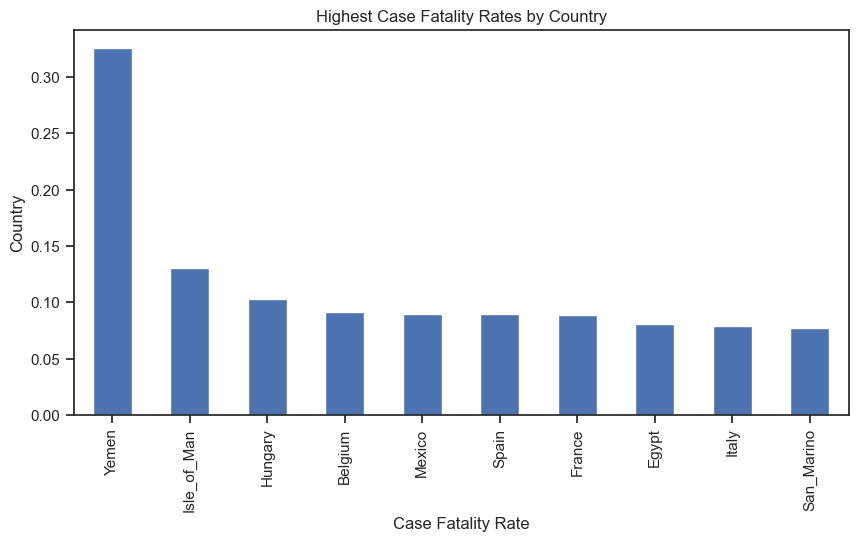

In [75]:
#TODO Use exploration techniques to find out why the plot didn't work
# Fix the data and produce the correct plot

# For some reason there was not data so i used the url to get data then removed infinity
# Load the data
url = 'https://opendata.ecdc.europa.eu/covid19/casedistribution/csv'
df = pd.read_csv(url)

# Calculate the case fatality rate (CFR)
df['CFR'] = df['deaths'] / df['cases']

# Replace inf and -inf with zero
df.replace([np.inf, -np.inf], 0, inplace=True)


# Group by country and calculate the mean CFR
highest_cfr_countries = df.groupby('countriesAndTerritories')['CFR'].mean().sort_values(ascending=True)

# Plot the top 10 countries with the highest CFR
plt.figure(figsize=(10, 5))
highest_cfr_countries.nlargest(10).plot(kind='bar')
plt.xlabel('Case Fatality Rate')
plt.ylabel('Country')
plt.title('Highest Case Fatality Rates by Country')
plt.show()

<Figure size 1000x500 with 0 Axes>

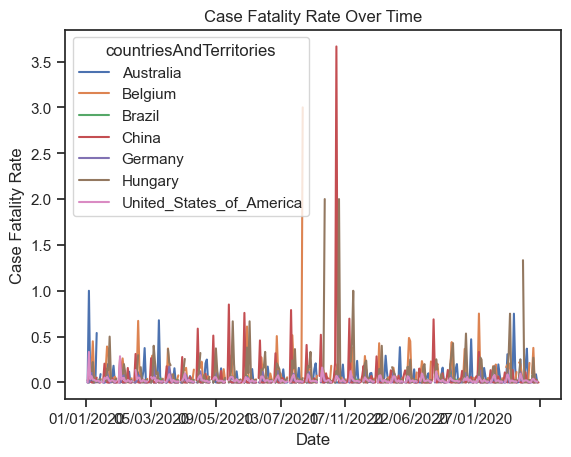

In [76]:
# lets plot the case fatality rate over time for selected countries

plt.figure(figsize=(10, 5))
df_filtered_frate = df[df['countriesAndTerritories'].isin(['Hungary','Grece','Germany','Belgium','China', 'Australia', 'Brazil', 'United_States_of_America'])]
df_filtered_frate.groupby(['dateRep', 'countriesAndTerritories'])['CFR'].mean().unstack().plot()
plt.xlabel('Date')
plt.ylabel('Case Fatality Rate')
plt.title('Case Fatality Rate Over Time')
plt.show()




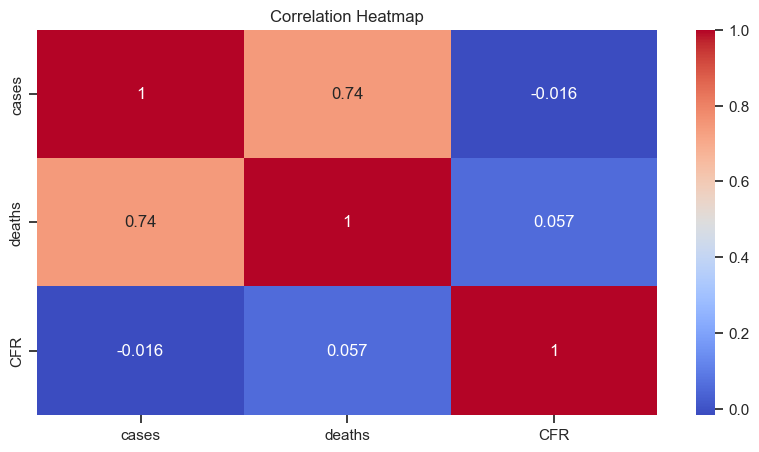

In [77]:
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.heatmap(df[['cases', 'deaths', 'CFR']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


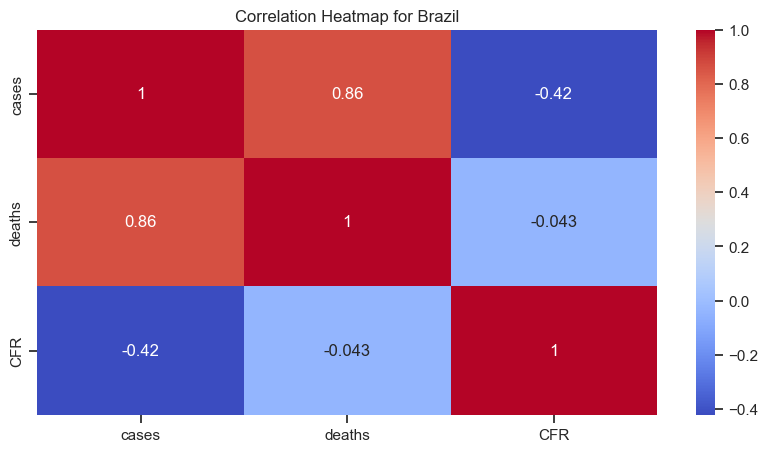

In [78]:
#TODO Select one country for which confirmed cases and deaths is highly correlated
# Plot both fields + CFR in a single plot, use a scale that allows you to gather insights on the data

import seaborn as sns
# print(df)
# print(df_filtered_frate.columns)

brazil_df = df_filtered_frate[df_filtered_frate['countriesAndTerritories'] == 'Brazil']

plt.figure(figsize=(10, 5))
sns.heatmap(brazil_df[['cases', 'deaths', 'CFR']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Brazil')
plt.show()

ValueError: Contour levels must be increasing

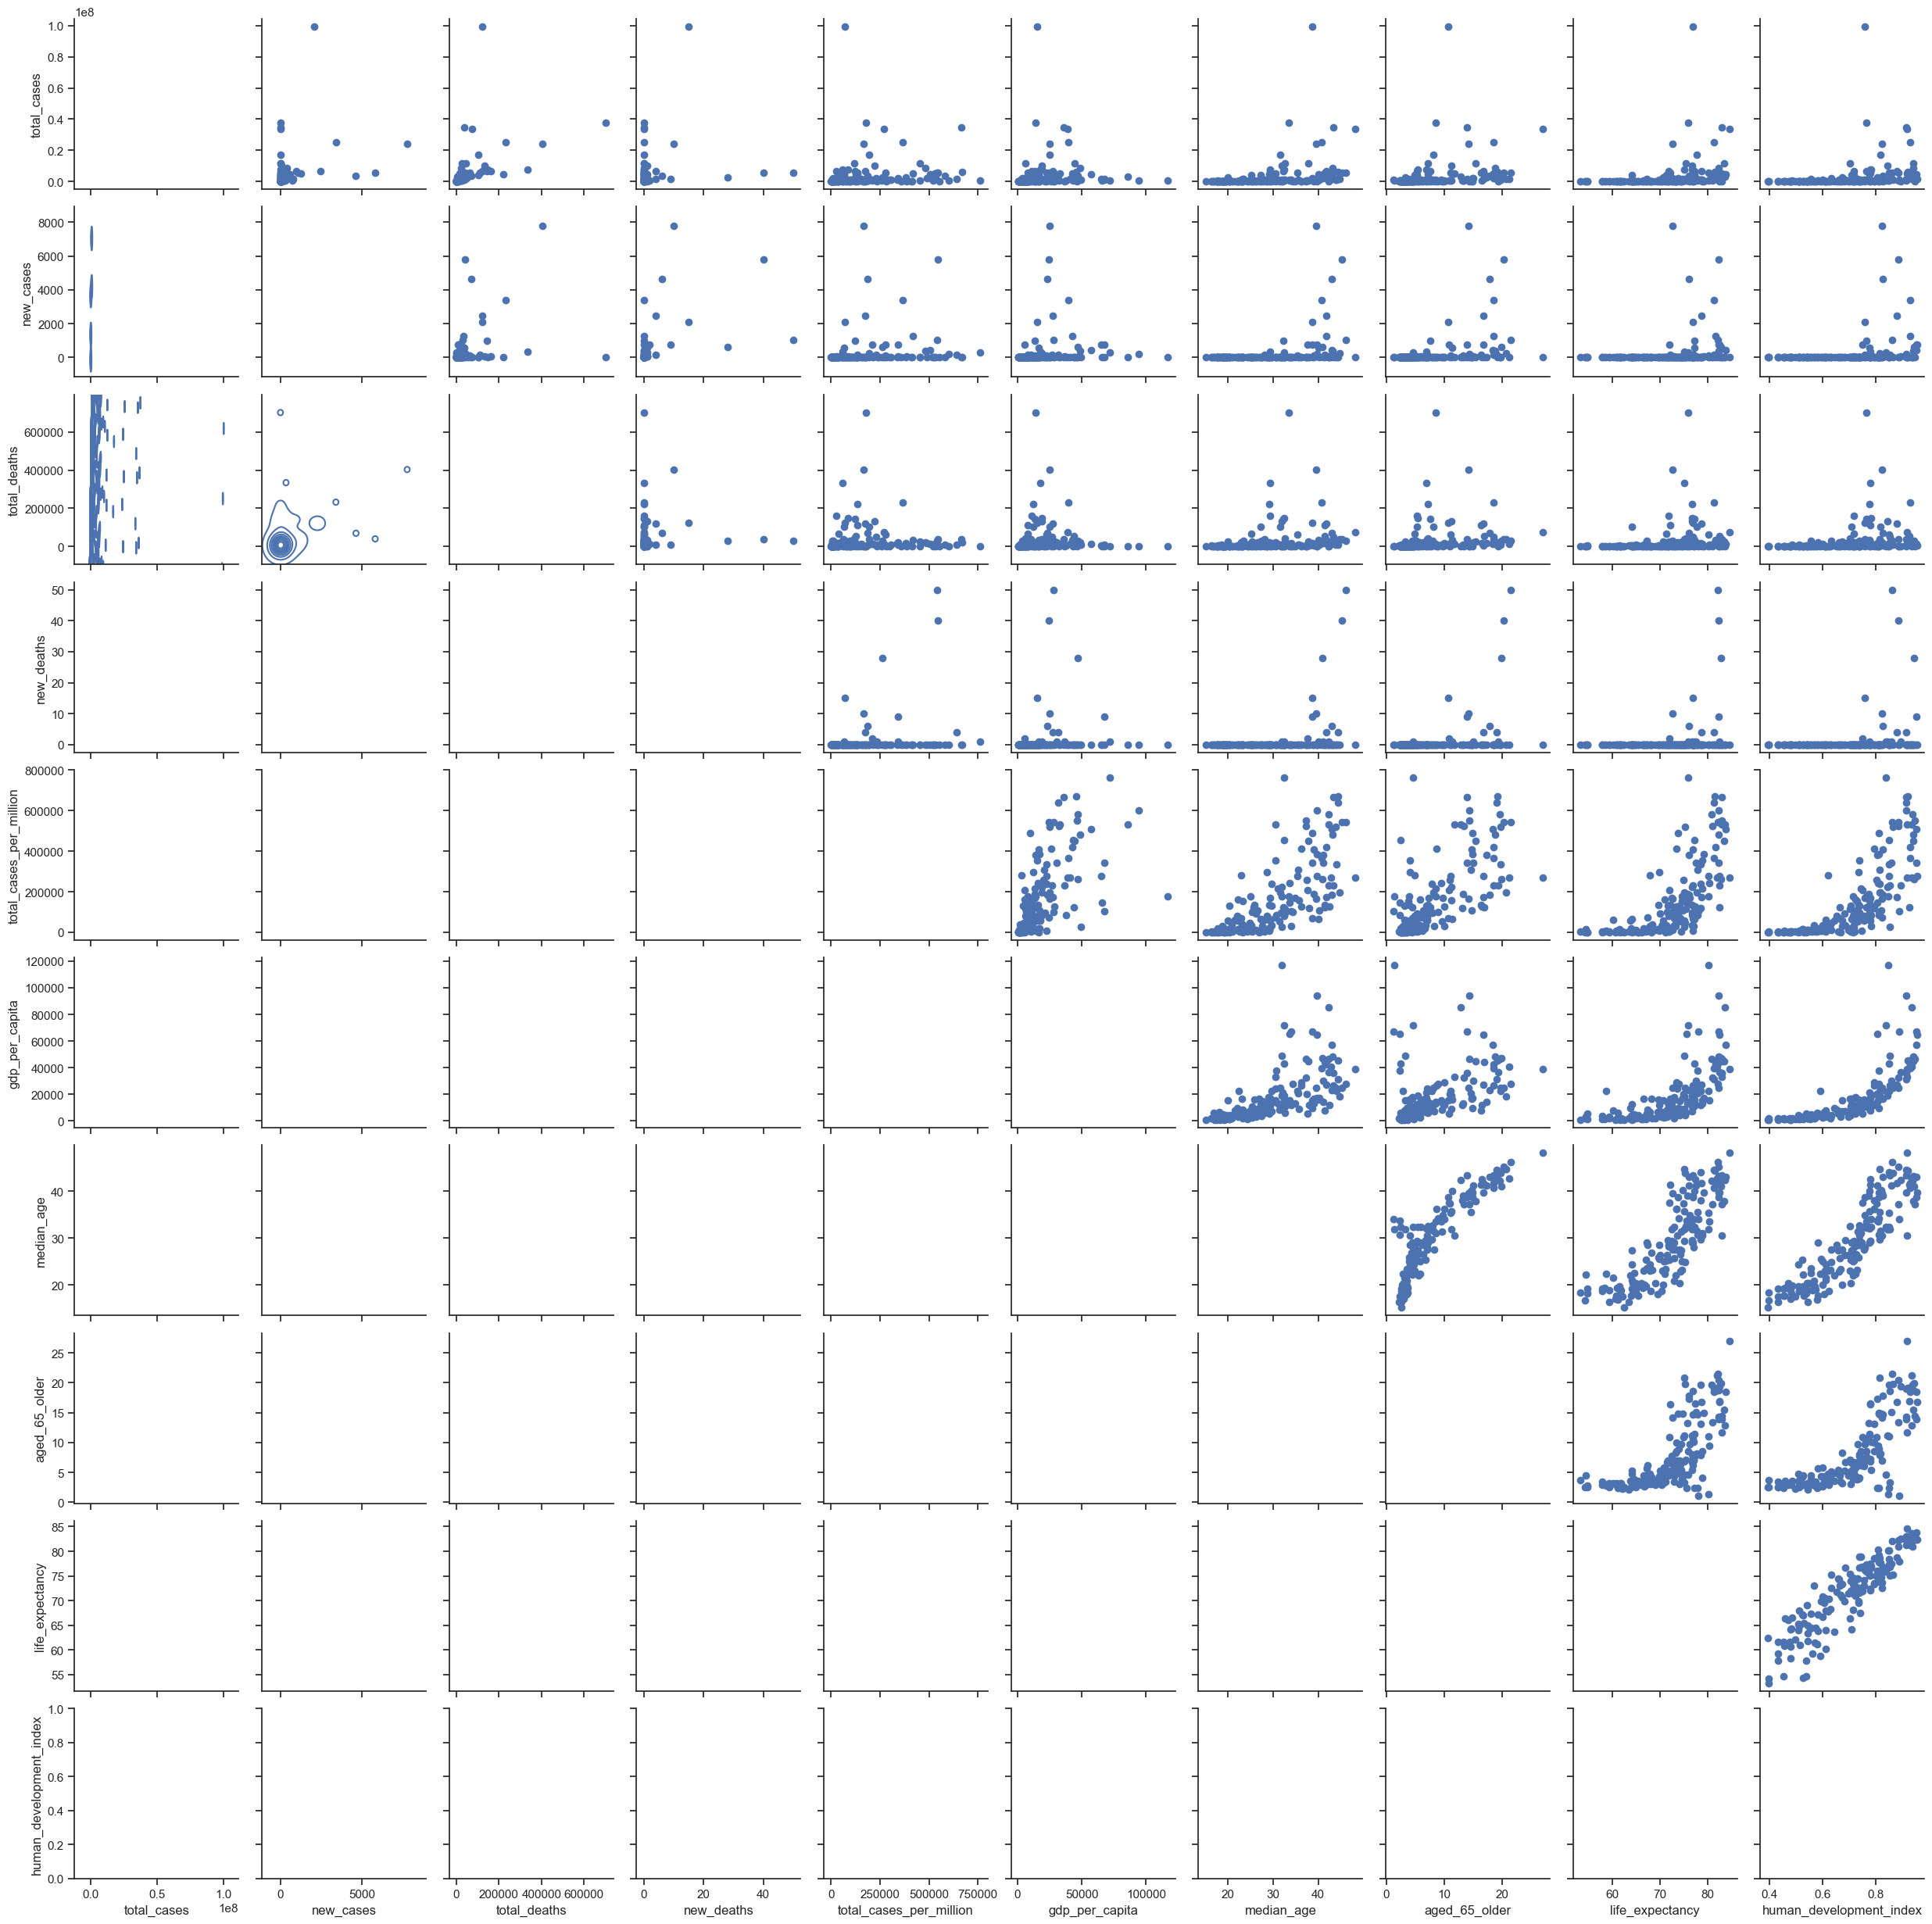

In [79]:
# Lets visualize a Grid plot (this one takes long to run)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset from the URL
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url)

# Filter for the most recent date for each country

# Select relevant numerical columns for pair plot
columns_of_interest = [
    'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_cases_per_million',
    'gdp_per_capita', 'median_age', 'aged_65_older',
    'life_expectancy', 'human_development_index'
]

loc_data = df.loc[df.groupby('location')['date'].idxmax()]

loc_data = loc_data[columns_of_interest].dropna()

# Set the style for seaborn
#sns.set(style="ticks", color_codes=True)

g = sns.PairGrid(loc_data)
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot)
g = g.map_diag(sns.kdeplot, lw=3, legend=False)
plt.show()

c:\Users\alexh\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\distributions.py:198: RuntimeWarning:

invalid value encountered in divide



ValueError: Contour levels must be increasing

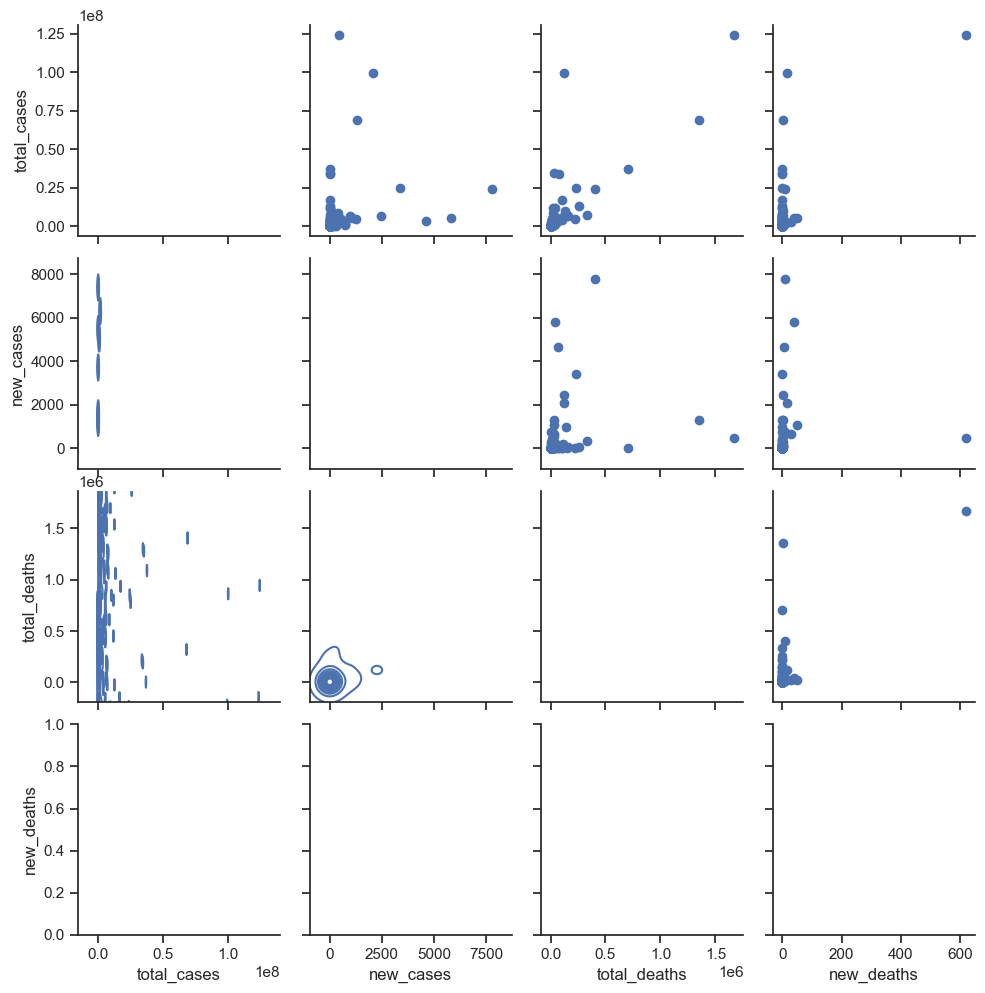

In [52]:
#TODO Make a new grid plot, but focus on just a few interesting columns

# Lets visualize a Grid plot (this one takes long to run)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Load the dataset from the URL
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url)

# Filter for the most recent date for each country

# Select relevant numerical columns for pair plot
columns_of_interest = [
    'total_cases', 'new_cases', 'total_deaths', 'new_deaths']



loc_data = df.loc[df.groupby('location')['date'].idxmax()]

loc_data = loc_data[columns_of_interest].dropna()


# Set the style for seaborn
sns.set(style="ticks", color_codes=True)

g = sns.PairGrid(loc_data)
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot)
g = g.map_diag(sns.kdeplot, lw=3, legend=False)
plt.show()

In [53]:
# If you get problems, try running in Google Colab

# Select three columns of interest for the 3D scatter plot
columns_3d = ['total_cases_per_million', 'gdp_per_capita', 'life_expectancy']


sp_data = df.loc[df.groupby('location')['date'].idxmax()]

sp_data = sp_data[['location'] + columns_3d]

# Create a 3D scatter plot
fig = px.scatter_3d(
    sp_data,
    x='total_cases_per_million',        # X-axis
    y='gdp_per_capita',                 # Y-axis
    z='life_expectancy',                # Z-axis
    color='location',                   # Color by country/region
    hover_name='location',              # Display country name on hover
    title='3D Scatter Plot of Max COVID-19 Cases, GDP per Capita, and Life Expectancy',
    labels={
        'total_cases_per_million': 'Total Cases per Million',
        'gdp_per_capita': 'GDP per Capita',
        'life_expectancy': 'Life Expectancy'
    }
)

# Show the plot
fig.show()

In [54]:
#TODO Change properties of the plot (e.g., marker, marker size, transparency, colormap) 
# and/or the data (e.g. filter data) to display the same scatter plot but where you can communicate
#information in a more insightful way
# Used in Google Colab

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Load the dataset from the URL
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url)

# If you get problems, try running in Google Colab

# Select three columns of interest for the 3D scatter plot
columns_3d = ['total_cases_per_million', 'gdp_per_capita', 'life_expectancy']


sp_data = df.loc[df.groupby('location')['date'].idxmax()]

sp_data = sp_data[['location'] + columns_3d]

# Create a 3D scatter plot
fig = px.scatter_3d(
    sp_data,
    x='total_cases_per_million',        # X-axis
    y='gdp_per_capita',                 # Y-axis
    z='life_expectancy',                # Z-axis
    color='gdp_per_capita',                   # Color by TGDP
    opacity=0.7,                        # Set transparency
    size_max=20,                        # Set marker size
    hover_name='location',              # Display country name on hover
    title='3D Scatter Plot of Max COVID-19 Cases, GDP per Capita, and Life Expectancy',
    labels={
        'total_cases_per_million': 'Total Cases per Million',
        'gdp_per_capita': 'GDP per Capita',
        'life_expectancy': 'Life Expectancy'
    }
)

# Show the plot
fig.show()

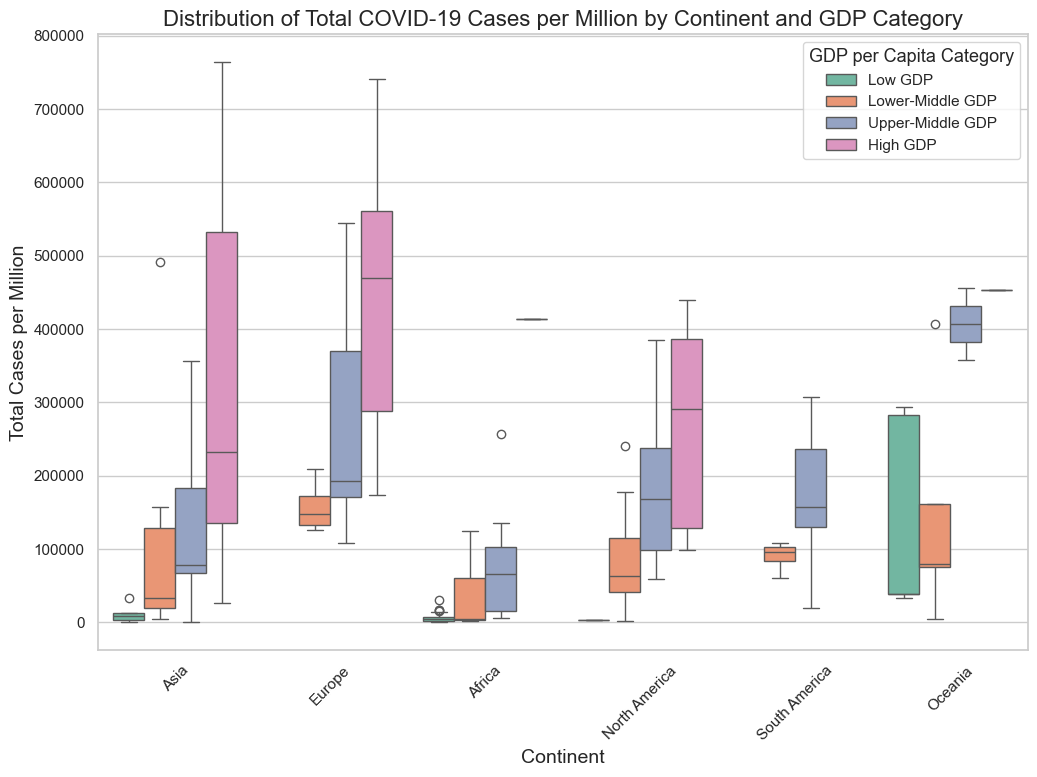

In [125]:
# Lets plot a boxplot to show the distribution of cases with respect to the country GDP category

bp_data = df.loc[df.groupby('location')['date'].idxmax()]

columns_of_interest = ['continent', 'total_cases_per_million', 'gdp_per_capita']
bp_data = bp_data[columns_of_interest].dropna()

# Create a new column 'gdp_category' based on quartiles of 'gdp_per_capita'
bp_data['gdp_category'] = pd.qcut(bp_data['gdp_per_capita'], 4, labels=['Low GDP', 'Lower-Middle GDP', 'Upper-Middle GDP', 'High GDP'])

# Set the style for seaborn
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(12, 8))
boxplot = sns.boxplot(
    x='continent',
    y='total_cases_per_million',
    hue='gdp_category',
    data=bp_data,
    palette='Set2'
)

# Add title and labels
plt.title('Distribution of Total COVID-19 Cases per Million by Continent and GDP Category', fontsize=16)
plt.xlabel('Continent', fontsize=14)
plt.ylabel('Total Cases per Million', fontsize=14)

# Decorate the plot with legends
plt.legend(title='GDP per Capita Category', title_fontsize='13', fontsize='11')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

#### Questions:
* Based on this plot, how does GDP affect the incidence of cases? 
The higher the GDP the total cases of Covid-19 increases
* Do you think that there are other factors that may be correlated with GDP and are the real cause of incidence? 
Yes GDP also incorporates more face to face contact with other people which means the spreading of the virus should be easier.

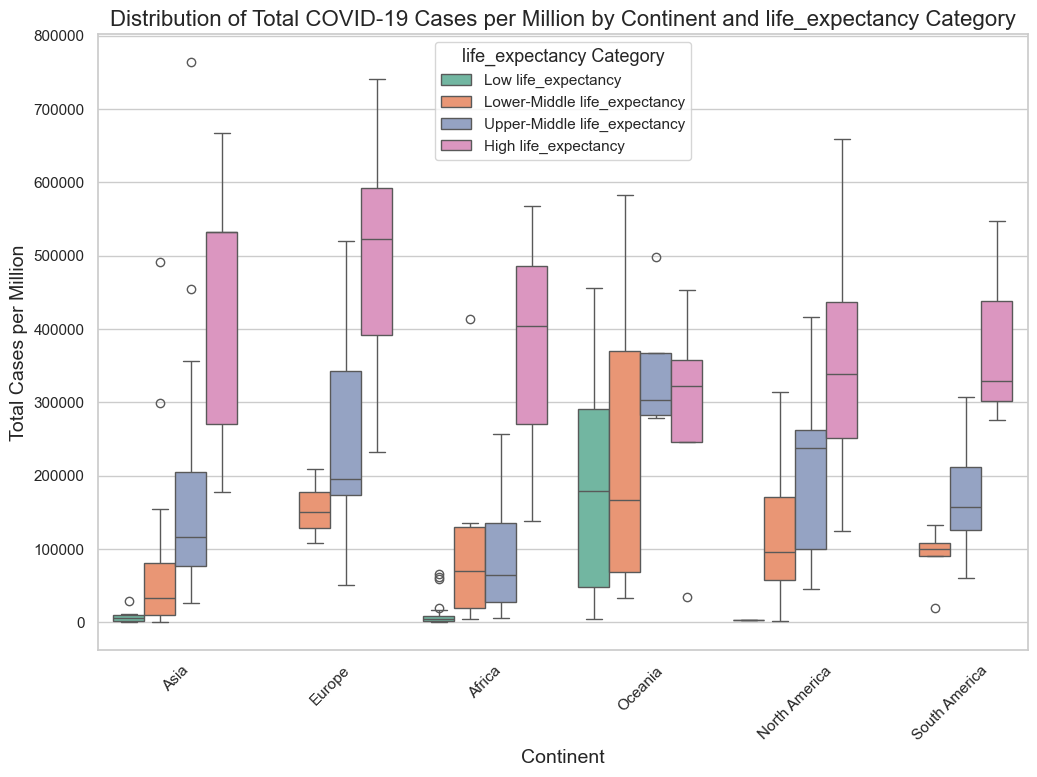

In [128]:
#TODO Explore the data (e.g., use correlation) to determine what other factors may have 
# a more direct effect on covid incidence. Replicate the boxplot for one or more of these factors

bp_data = df.loc[df.groupby('location')['date'].idxmax()]

columns_of_interest = ['continent', 'total_cases_per_million', 'life_expectancy']
bp_data = bp_data[columns_of_interest].dropna()

# Create a new column 'life_expectancy' based on quartiles of 'life_expectancy'
bp_data['life_expectancy'] = pd.qcut(bp_data['life_expectancy'], 4, labels=['Low life_expectancy', 'Lower-Middle life_expectancy', 'Upper-Middle life_expectancy', 'High life_expectancy'])

# Set the style for seaborn
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(12, 8))
boxplot = sns.boxplot(
    x='continent',
    y='total_cases_per_million',
    hue='life_expectancy',
    data=bp_data,
    palette='Set2'
)

# Add title and labels
plt.title('Distribution of Total COVID-19 Cases per Million by Continent and life_expectancy Category', fontsize=16)
plt.xlabel('Continent', fontsize=14)
plt.ylabel('Total Cases per Million', fontsize=14)

# Decorate the plot with legends
plt.legend(title='life_expectancy Category', title_fontsize='13', fontsize='11')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()